In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(filename)
        
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

sample_submission.csv
/kaggle/input/ue19cs312-assignment/sample_submission.csv
submission.csv
/kaggle/input/ue19cs312-assignment/submission.csv
train.csv
/kaggle/input/ue19cs312-assignment/train.csv
test.csv
/kaggle/input/ue19cs312-assignment/test.csv


**We have implemented various models for our data analysis: Multi Linear Regression, Support Vector Regression, Ridge Regression and Holt Winter's Exponential Smoothing Model (Time series Model) which is useful for forecasting time-series data**

# Multi Linear Regression Model Implementation

In [2]:
from sklearn.svm import SVR #Support Vector Regression model
from sklearn.pipeline import make_pipeline #Pipeline function to build the model
from sklearn.preprocessing import StandardScaler #Normalising the data
from sklearn import linear_model
import matplotlib.pyplot as plt

In [3]:
#Importing all the necessary files
training_data = pd.read_csv('/kaggle/input/ue19cs312-assignment/train.csv', parse_dates=True)
test_data=pd.read_csv('/kaggle/input/ue19cs312-assignment/test.csv')
output=pd.read_csv('/kaggle/input/ue19cs312-assignment/submission.csv')

# Data Prepocessing and Exploratory Data Analysis

The stocks' opening, closing, lowest and highest prices are plotted against the date to give us an idea of the nature of the data. We have also checked for NaN values, and dropped any useless columns if necessary.

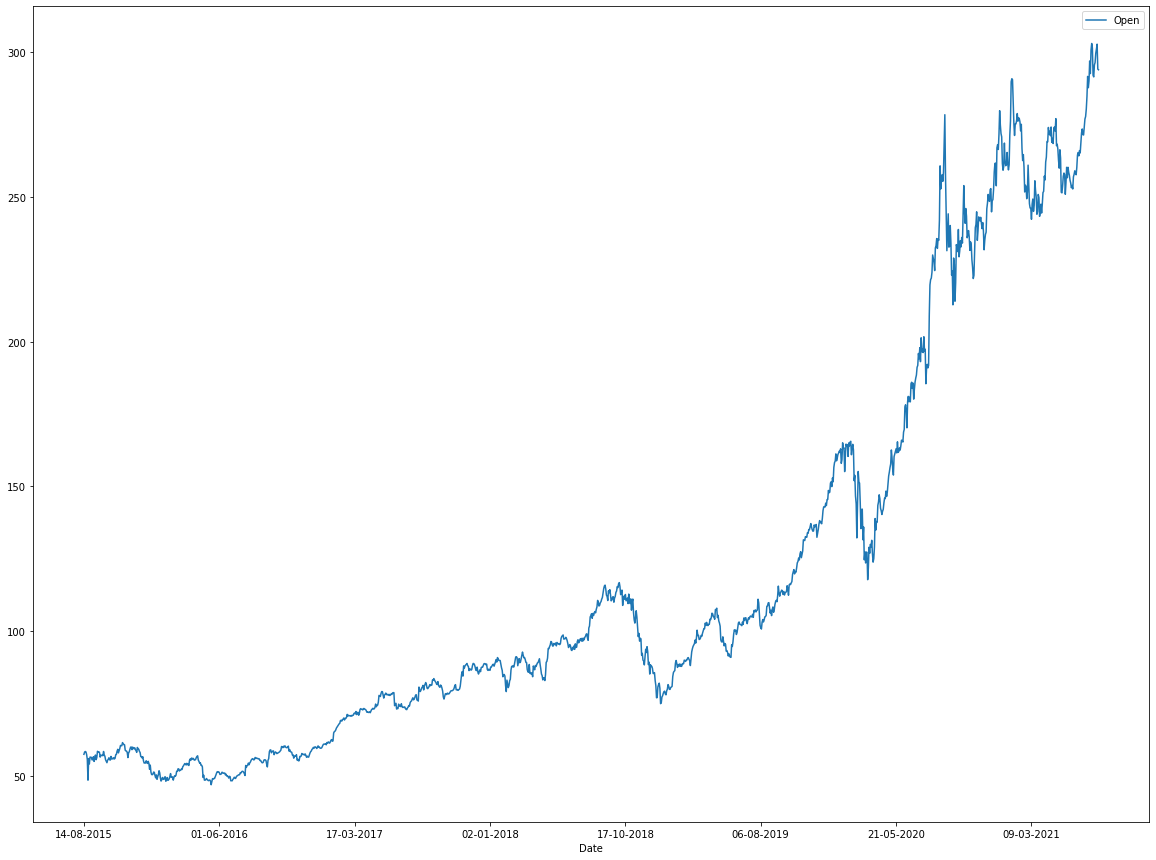

In [4]:
ax = plt.gca()
training_data.plot(kind='line', x='Date', y=['Open'], ax=ax, figsize=(20,15))
plt.show()

<AxesSubplot:xlabel='Date'>

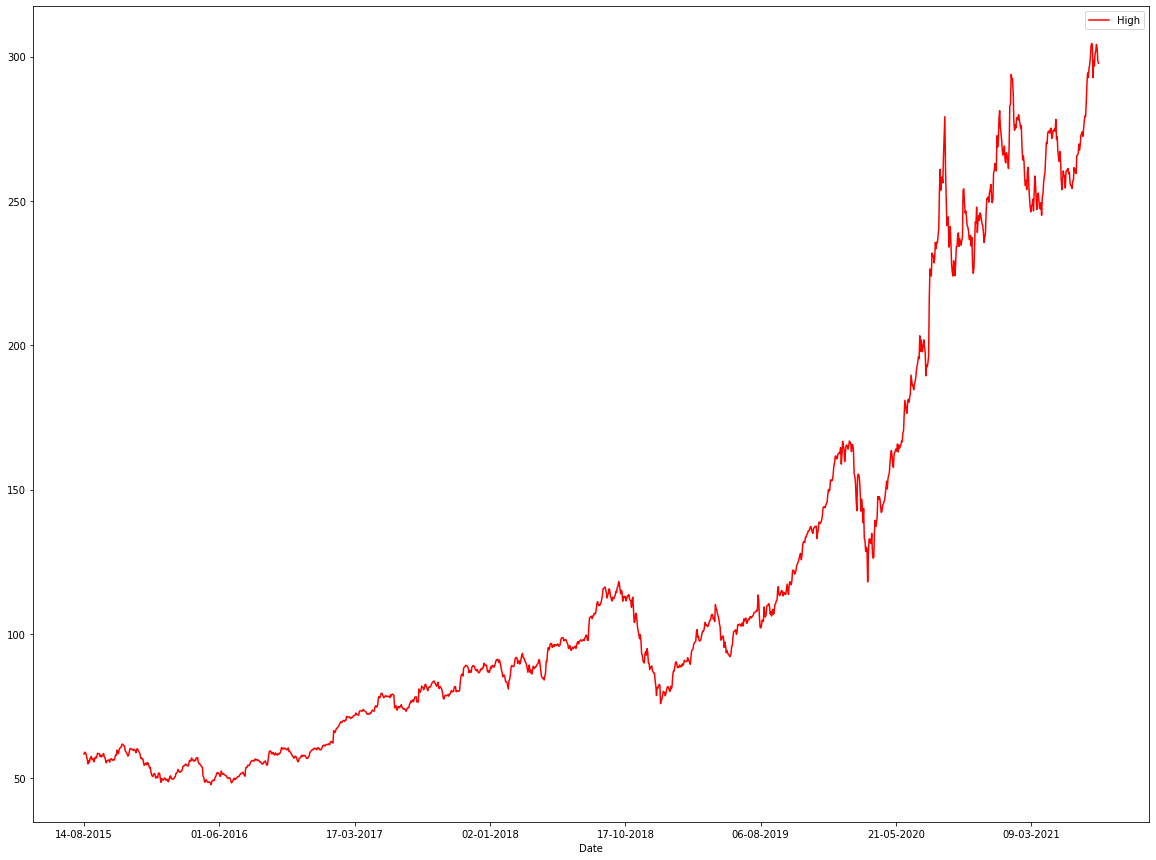

In [5]:
training_data.plot(kind='line', x='Date', y='High', ax=plt.gca(), figsize=(20,15), color='red')

<AxesSubplot:xlabel='Date'>

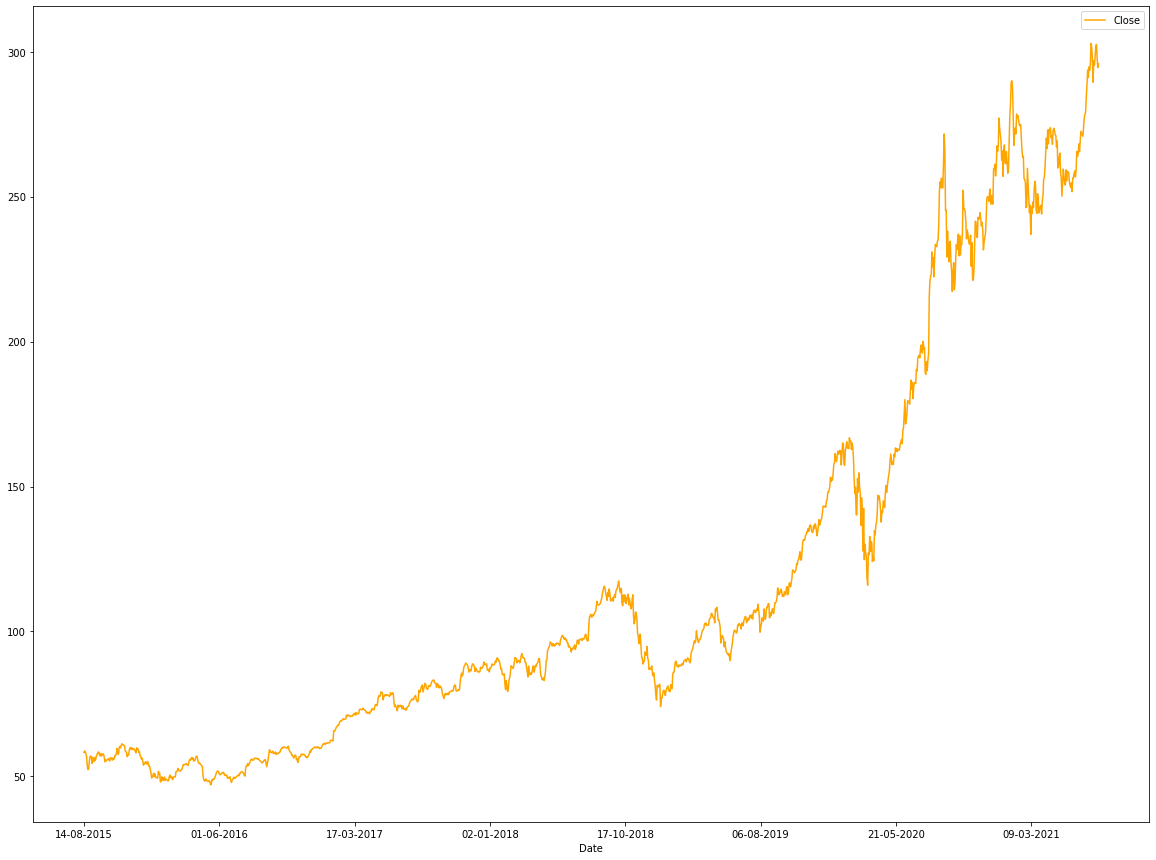

In [6]:
training_data.plot(kind='line', x='Date', y='Close', ax=plt.gca(), figsize=(20,15), color='orange')


<AxesSubplot:xlabel='Date'>

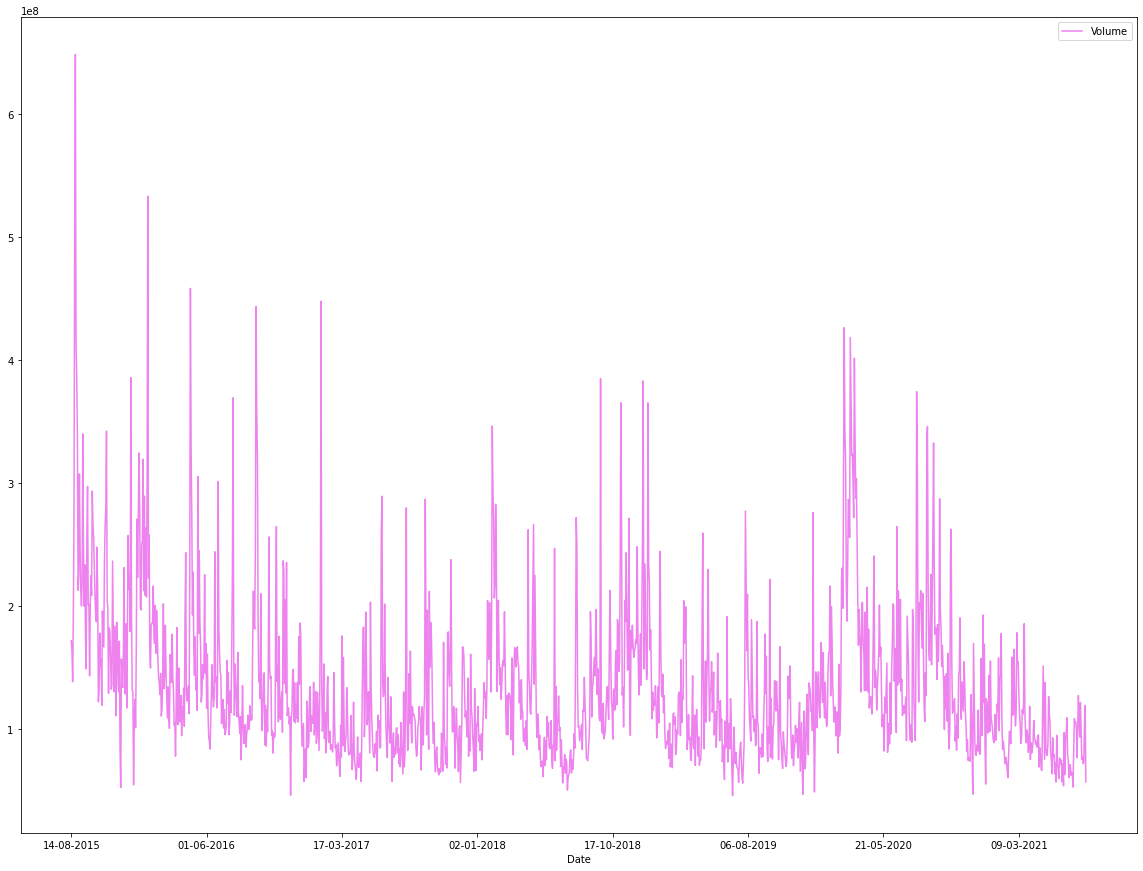

In [7]:
training_data.plot(kind='line', x='Date', y='Volume', ax=plt.gca(), figsize=(20,15), color='violet')

# Assumptions for Linear Regression model


1. Linearity: The relationship between X and the mean of Y is linear.
2. Homoscedasticity: The variance of residual is the same for any value of X.
3. Independence: Observations are independent of each other.
4. Normality: For any fixed value of X, Y is normally distributed.

In [8]:
X=training_data
X=X.drop(['Close'], axis = 1)
X=X.drop(['Date'], axis = 1)

y=training_data['Close']

m=len(y)

X_test=test_data
X_test=X_test.drop(['Close'], axis = 1)
X_test=X_test.drop(['Date'], axis = 1)

In [9]:
# multi linear regression model

model_ols =  linear_model.LinearRegression(normalize=True)
model_ols.fit(X,y) 

predictedclose = pd.DataFrame(model_ols.predict(X), columns=['Predicted close']) # Create new dataframe of column'Predicted Price'
actualclose = pd.DataFrame(y, columns=['Close'])
actualclose = actualclose.reset_index(drop=True) # Drop the index so that we can concat it, to create new dataframe
df_actual_vs_predicted = pd.concat([actualclose,predictedclose],axis =1)
df_actual_vs_predicted

,Close,Predicted close
0,58.237720,58.058091
1,58.788651,58.637409
2,58.485638,58.658551
3,57.801575,57.872730
4,56.718082,56.434573
...,...,...
1495,301.675507,300.431889
1496,302.534241,302.614114
1497,298.100861,297.618485
1498,294.526215,294.326674


In [10]:
#results of linear model

price = model_ols.predict(X_test)
print(price)

[295.94068788 296.42207306 298.78281871 298.29227299 298.55801517
 297.6807176  297.00001086 298.12968955 297.21237929 301.4327705
 302.43547645 303.34567821 305.96812534 300.75228815 299.03340721
 300.44339188 303.9129429  305.56922684 302.37549472 301.53427914
 300.90273033 309.74541434 308.27245655 313.27106422 311.78852778
 312.72702535 317.65606983 314.5329393  314.5551577  306.64351822]


# Ridge Regression Model

In [11]:
model_r = linear_model.Ridge(normalize= True, alpha= 0.001)
model_r.fit(X,y)
priceridge = model_r.predict(X_test)
print(priceridge)

[294.77348579 296.98646632 297.55981511 298.85289402 298.69553435
 297.86340991 297.39725289 298.08598324 297.36138029 299.472929
 302.88787206 302.57551893 305.78552152 302.46662581 297.07848905
 300.32187431 302.89973058 304.92038221 303.52992305 301.77835269
 300.57837626 306.3193372  309.43741931 312.07541096 312.34590207
 312.80705735 316.38977741 316.69513029 315.36147547 310.30830276]


# Support Vector Regression Model

In simple regression, the idea is to minimize the error rate while in SVR the idea is to fit the error inside a certain threshold which means, work of SVR is to approximate the best value within a given margin. Maximising the values within the margin and hyper-tuning the parameters helped us obtain the lowest RMSE value and this is the model we have chosen for our final predictions.

In [12]:
# svr polynomial model

model_svr_regr = make_pipeline(StandardScaler(),  SVR(kernel="poly", C=100, gamma="auto", degree=3, epsilon=0.1, coef0=1))
model_svr_regr.fit(X, y)
price_svr=model_svr_regr.predict(X_test)
print(price_svr)

[296.23855216 296.36404045 299.12092415 298.27270518 298.70767325
 297.77457024 297.09917059 298.17142667 297.37325029 301.9105187
 302.38869176 303.6744899  305.88871271 300.49116798 299.47504873
 300.54430495 304.20870004 305.85551652 302.16414265 301.62681721
 301.07824919 310.65339552 307.77888874 313.45617058 311.59664772
 312.7043391  317.85018103 313.99273409 314.35902072 307.09953657]


# Parameter Tuning

We have choosen parameters using GridSearchCV that result in the least RMSE value for our predictions.

In [13]:
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn import linear_model

from sklearn.metrics import mean_squared_error
from sklearn.model_selection import GridSearchCV

from sklearn.metrics import classification_report, confusion_matrix

In [14]:
training_data1 = pd.read_csv('/kaggle/input/ue19cs312-assignment/train.csv')

target_data1 = training_data1['Close']

training_data1 = training_data1.drop(['Close'],axis=1)
training_data1 = training_data1.drop(['Date'],axis=1)
print(training_data1)

            Open        High         Low     Volume
0      57.484790   58.398406   57.342469  171718000
1      58.274453   59.013611   58.026536  163538800
2      58.453501   58.917197   58.260678  138242800
3      58.301997   58.494820   57.650069  193146000
4      57.374601   57.498558   56.249794  274006400
...          ...         ...         ...        ...
1495  299.658540  301.995035  298.400415   71447400
1496  301.096392  304.211720  299.958083   72434100
1497  302.793811  302.973565  295.664509  104818600
1498  294.186727  298.500271  289.653510  118931200
1499  293.947087  297.661523  293.727415   56699500

[1500 rows x 4 columns]


In [15]:
df_feat = training_data1
df_target = target_data1

print(df_feat.head(),"\n\n",df_target.head())

        Open       High        Low     Volume
0  57.484790  58.398406  57.342469  171718000
1  58.274453  59.013611  58.026536  163538800
2  58.453501  58.917197  58.260678  138242800
3  58.301997  58.494820  57.650069  193146000
4  57.374601  57.498558  56.249794  274006400 

 0    58.237720
1    58.788651
2    58.485638
3    57.801575
4    56.718082
Name: Close, dtype: float64


In [16]:
from sklearn.model_selection import train_test_split
 
X1_train, X1_test, y1_train, y1_test = train_test_split(
                        df_feat, df_target,
                test_size = 0.30, random_state = 101)

In [17]:
scaler = StandardScaler()
X1_train = scaler.fit_transform(X1_train)
X1_test = scaler.transform(X1_test)

In [18]:
model = SVR()
model.fit(X1_train, y1_train)
#baseline without tuning
print("[INFO] evaluating...")
print("R2: {:.2f}".format(model.score(X1_test, y1_test)))

[INFO] evaluating...
R2: 0.97


In [19]:

from scipy.stats import loguniform
model = SVR(gamma='auto')
kernel = [ "poly"]
tolerance = loguniform(1e-6, 1e-3)
C = [1, 1.5, 2, 2.5, 3,7,7.5,8,8.5,9,9.5,10]
coef0=[0,1]
grid = dict(kernel=kernel, tol=tolerance, C=C,coef0=coef0)

In [20]:
# initialize a cross-validation fold and perform a randomized-search
# to tune the hyperparameters
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import RepeatedKFold

print("[INFO] grid searching over the hyperparameters...")
cvFold = RepeatedKFold(n_splits=10, n_repeats=3, random_state=1)


randomSearch = RandomizedSearchCV(estimator=model, n_jobs=-1,
	cv=cvFold, param_distributions=grid,
	scoring="neg_mean_squared_error")


searchResults = randomSearch.fit(X1_train, y1_train)
# extract the best model and evaluate it
print("[INFO] evaluating...")

bestModel = searchResults.best_estimator_
print("R2: {:.2f}".format(bestModel.score(X1_test, y1_test)))

[INFO] grid searching over the hyperparameters...
[INFO] evaluating...
R2: 1.00


In [21]:
bestModel

SVR(C=9.5, coef0=1, gamma='auto', kernel='poly', tol=9.176658344305015e-06)

In [22]:
model_svr_regr_tune = make_pipeline(StandardScaler(),  bestModel)
model_svr_regr_tune.fit(X, y)
price_svr=model_svr_regr_tune.predict(X_test)
print(price_svr)

[296.39521307 296.21366974 299.36642914 298.09971611 298.64500196
 297.67990263 296.94458442 298.1660513  297.2660727  302.32079246
 302.18853914 303.7661706  305.89056423 300.0578269  299.81849292
 300.5192042  304.43370907 305.9802344  301.87018372 301.52054389
 301.11617255 311.55202173 307.35068242 313.81689601 311.34609645
 312.59910401 318.28737494 313.04394511 313.99275497 304.9832515 ]


# Holt Winter's Exponential Smoothing Model Implementation

* This model is chosen because it makes use of exponential smoothing by exponentially decreasing weights and values against historical data to decrease the value of the weight for the older data. 

* Moreover, this model also takes into account the seasonal component along with the trend for more accurate and reliable results.

## Parameters chosen
* Time Period = 5 (Predicting prices only for 5 days in the week)
* Alpha = 0.5

## Time Series Model Assumptions
* Stationarity: The time-series data is stationary (constant mean and covariance).
* By predciting future values by analyzing past values, we assume that the future value trend and seasonality would be similar to that of the historical data. 

In [23]:
training_data = pd.read_csv('/kaggle/input/ue19cs312-assignment/train.csv',index_col='Date', parse_dates=True)
testing_data = pd.read_csv('/kaggle/input/ue19cs312-assignment/test.csv',index_col='Date', parse_dates=True)
sample = pd.read_csv('/kaggle/input/ue19cs312-assignment/sample_submission.csv')

In [24]:
training_data = training_data.asfreq('D')
print(training_data.index)

DatetimeIndex(['2015-01-09', '2015-01-10', '2015-01-11', '2015-01-12',
               '2015-01-13', '2015-01-14', '2015-01-15', '2015-01-16',
               '2015-01-17', '2015-01-18',
               ...
               '2021-11-28', '2021-11-29', '2021-11-30', '2021-12-01',
               '2021-12-02', '2021-12-03', '2021-12-04', '2021-12-05',
               '2021-12-06', '2021-12-07'],
              dtype='datetime64[ns]', name='Date', length=2525, freq='D')


In [25]:
training_data.head()

,Open,High,Low,Volume,Close
Date,,,,,
2015-01-09,55.570328,56.364576,54.289426,307383600.0,54.454704
2015-01-10,55.074488,55.326996,54.266464,255716400.0,55.308632
2015-01-11,NaN,NaN,NaN,NaN,NaN
2015-01-12,59.751996,59.779659,58.880575,139409600.0,59.101887
2015-01-13,NaN,NaN,NaN,NaN,NaN


In [26]:
training_data.dropna(subset=["Open", "High", "Low", "Volume", "Close"], inplace=True)

In [27]:
#Checking for NaN values in the dataset
print(training_data.isna().sum())
print(training_data.tail())
print(training_data.shape)

Open      0
High      0
Low       0
Volume    0
Close     0
dtype: int64
                  Open        High         Low       Volume       Close
Date                                                                   
2021-12-02  272.843054  275.195513  271.527256   60145100.0  274.876526
2021-12-03  245.032049  246.567131  242.559962   88105100.0  246.288025
2021-12-04  269.194747  269.852646  265.426803   91420000.0  266.642914
2021-12-05  251.430793  253.907079  249.134231  112172300.0  250.172668
2021-12-07  296.982555  297.202227  292.569154   76299700.0  293.567657
(1500, 5)


In [28]:
df = training_data.copy()
df1 = testing_data.copy()



In [29]:
#Holt's Winter Forecasting Model

from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.holtwinters import SimpleExpSmoothing 
from statsmodels.tsa.holtwinters import ExponentialSmoothing
from matplotlib import pyplot as plt


Open      0
High      0
Low       0
Volume    0
Close     0
dtype: int64
Open      True
High      True
Low       True
Volume    True
Close     True
dtype: bool
                 Open       High        Low       Volume      Close
Date                                                               
2015-01-09  55.570328  56.364576  54.289426  307383600.0  54.454704
2015-01-10  55.074488  55.326996  54.266464  255716400.0  55.308632
2015-01-12  59.751996  59.779659  58.880575  139409600.0  59.101887
2015-02-09  55.607053  56.575760  55.102036  247555200.0  56.575760
2015-02-10  54.587844  55.965156  54.376656  232079200.0  55.675919
1500


<AxesSubplot:title={'center':'Stock Price'}, xlabel='Date'>

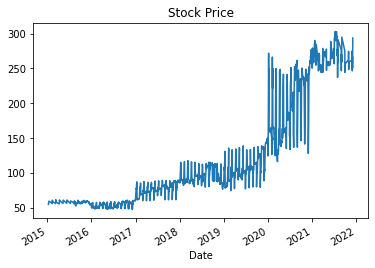

In [30]:
print(df.isna().sum())
print((df>0).all())
print(df.head())
print(len(df['Close']))
df['Close'].plot(title='Stock Price')

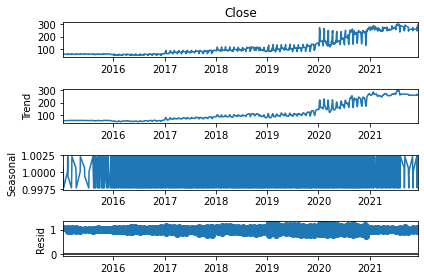

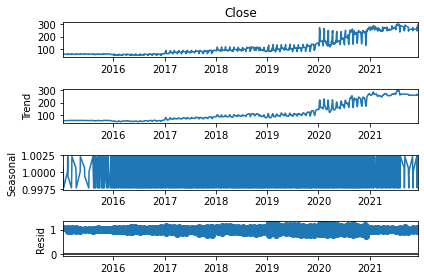

In [31]:
#Decomposing the Time series
decompose_result = seasonal_decompose(df['Close'], model='multiplicative', period=5)
decompose_result.plot()

In [32]:
df = df.asfreq('D')
print(df.index)
#Set alpha value and define Time period
m = 12
alpha = 1/(2 * m)

DatetimeIndex(['2015-01-09', '2015-01-10', '2015-01-11', '2015-01-12',
               '2015-01-13', '2015-01-14', '2015-01-15', '2015-01-16',
               '2015-01-17', '2015-01-18',
               ...
               '2021-11-28', '2021-11-29', '2021-11-30', '2021-12-01',
               '2021-12-02', '2021-12-03', '2021-12-04', '2021-12-05',
               '2021-12-06', '2021-12-07'],
              dtype='datetime64[ns]', name='Date', length=2525, freq='D')


In [33]:
df.dropna(subset=["Open", "High", "Low", "Volume", "Close"], inplace=True)
print(df.isna().sum())

Open      0
High      0
Low       0
Volume    0
Close     0
dtype: int64


/opt/conda/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:583: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


<AxesSubplot:title={'center':'Holt Winters Single Exponential Smoothing'}, xlabel='Date'>

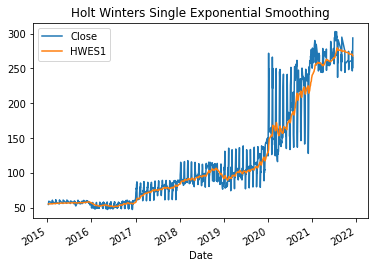

In [34]:
#Single Exponential Smoothing
df['HWES1'] = SimpleExpSmoothing(df['Close'], initialization_method='estimated').fit(smoothing_level=alpha, optimized=False,use_brute=True).fittedvalues

df[['Close', 'HWES1']].plot(title='Holt Winters Single Exponential Smoothing')

/opt/conda/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:583: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
/opt/conda/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:583: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


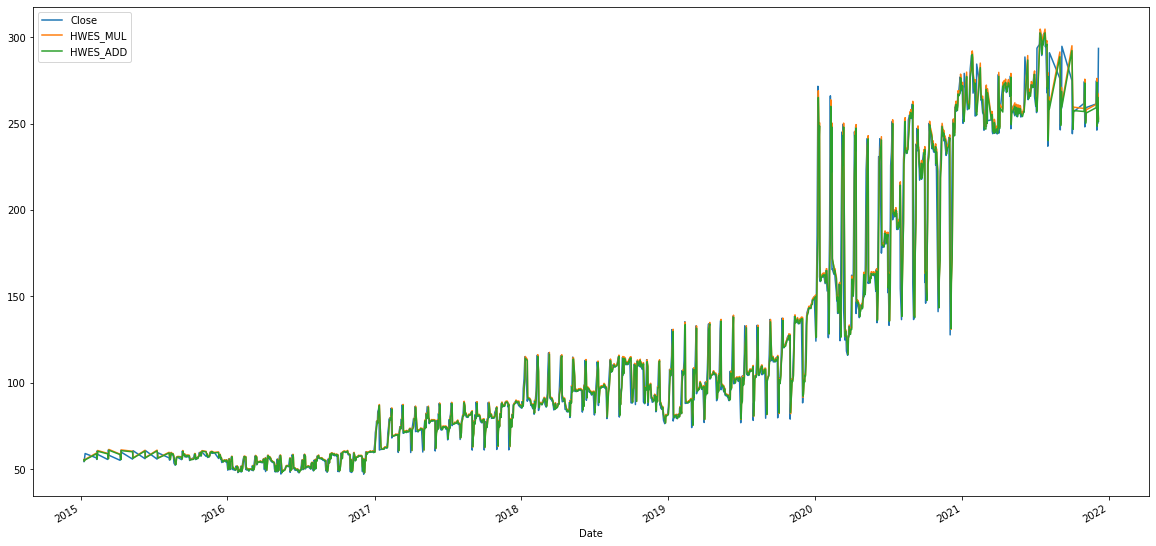

In [35]:
#Double Exponential Smoothing
df['HWES_ADD'] = ExponentialSmoothing(df['Close'], trend='add',initialization_method='estimated').fit().fittedvalues
df['HWES_MUL'] = ExponentialSmoothing(df['Close'], trend='mul',initialization_method='estimated').fit().fittedvalues

df[['Close', 'HWES_MUL', 'HWES_ADD']].plot(figsize=(20,10));

/opt/conda/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:583: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
/opt/conda/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:583: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
/opt/conda/lib/python3.7/site-packages/statsmodels/tsa/holtwinters/model.py:922: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  ConvergenceWarning,


<AxesSubplot:xlabel='Date'>

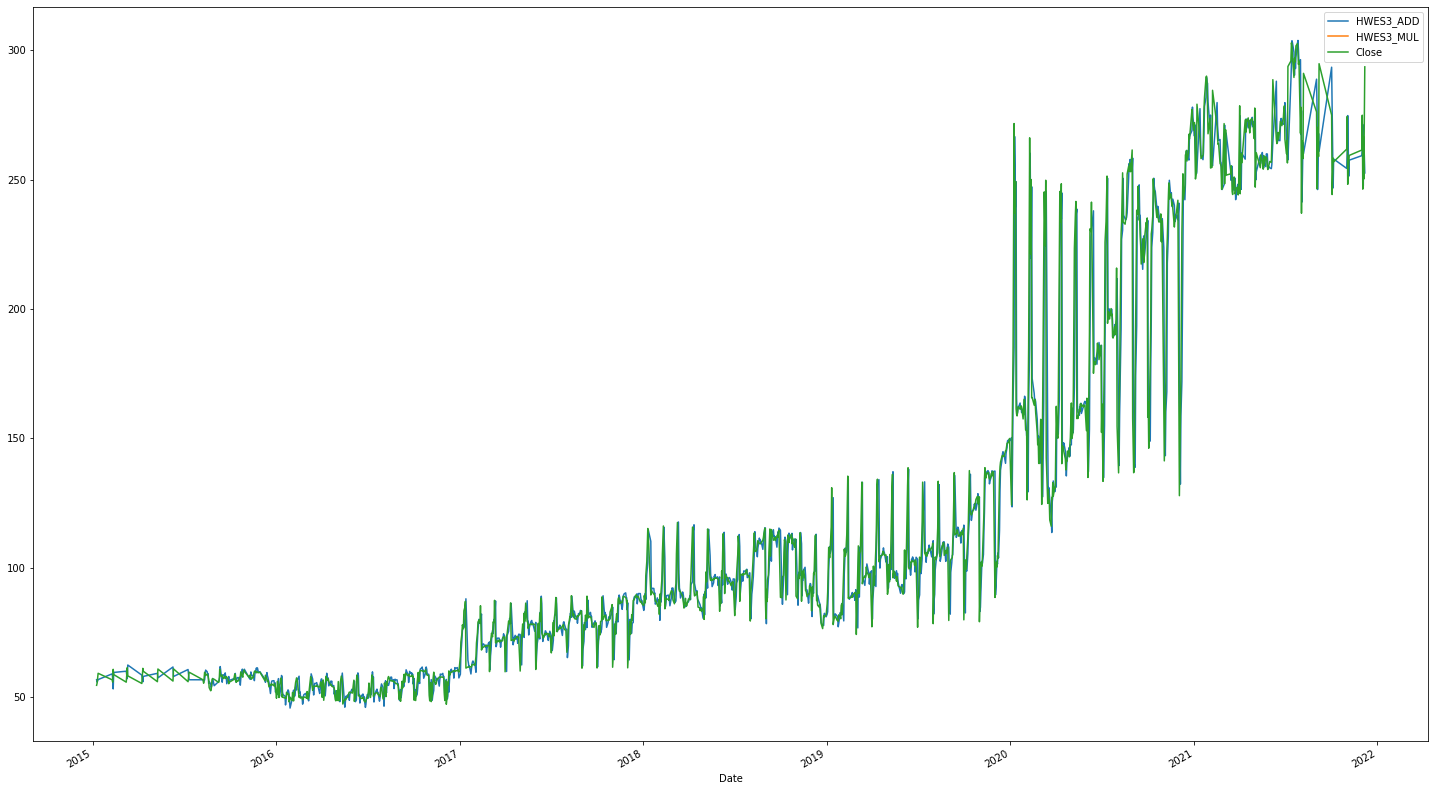

In [36]:
#Triple Exponential Smoothing
df['HWES3_ADD'] = ExponentialSmoothing(df['Close'], trend='add', seasonal='add', seasonal_periods=7,initialization_method='estimated').fit().fittedvalues
df['HWES3_MUL'] = ExponentialSmoothing(df['Close'], trend='mul', seasonal='mul', seasonal_periods=7,initialization_method='estimated').fit().fittedvalues

df[['HWES3_ADD','HWES3_MUL','Close']].plot(figsize=(25,15))

In [37]:
#Forecasting
fitted_model = ExponentialSmoothing(df['Close'], trend='add', seasonal='add', seasonal_periods=7).fit()
predictions = fitted_model.forecast(30)
predictions

/opt/conda/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:583: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
/opt/conda/lib/python3.7/site-packages/statsmodels/tsa/holtwinters/model.py:429: FutureWarning: After 0.13 initialization must be handled at model creation
  FutureWarning,
/opt/conda/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:379: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  ValueWarning)


1500    292.829060
1501    291.424144
1502    291.143920
1503    286.695737
1504    286.355169
1505    290.648326
1506    292.838178
1507    295.154425
1508    293.749510
1509    293.469285
1510    289.021103
1511    288.680534
1512    292.973691
1513    295.163544
1514    297.479790
1515    296.074875
1516    295.794650
1517    291.346468
1518    291.005900
1519    295.299056
1520    297.488909
1521    299.805156
1522    298.400240
1523    298.120016
1524    293.671833
1525    293.331265
1526    297.624422
1527    299.814275
1528    302.130521
1529    300.725606
dtype: float64

# Comparison between Regression and Time Series Model

* The SVR model gave us an RMSE value of 1.205 whereas the Holt Winter's Model gave us an RMSE value of 3.55. Clearly, the SVR model yielded more accurate predictions

* Putting the performance metrics aside, the time-series model takes into account factors like trend and seasonality, which the regression model does not take care of these.

* Taking all the factors in the account, we have chosen the SVR model to predict the test data as it gave us a lower RMSE score. However, it may not be valid in all cases where the data shows a strong trend or seasonality.



# Final Submission

In [38]:
#Submitting the predictions obtained from our hyper-tuned SVR Model
output=pd.read_csv('/kaggle/input/ue19cs312-assignment/submission.csv')
output
output['Close'] = price_svr
output

output.to_csv("submission.csv",index=False)


In [39]:
#Support Vector Regressor
#svr_model = SVR(kernel='linear')
#model = svr_model.fit(X,y)

